# IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import joblib

# DATA IMPORTATION

In [33]:

electricity_cost_df = pd.read_csv(r"C:\Users\dmade\Downloads\archive (18)\electricity_cost_dataset.csv")
electricity_cost_df

site area structure type  water consumption  recycling rate  \
0          1360      Mixed-use             2519.0              69   
1          4272      Mixed-use             2324.0              50   
2          3592      Mixed-use             2701.0              20   
3           966    Residential             1000.0              13   
4          4926    Residential             5990.0              23   
...         ...            ...                ...             ...   
9995        708     Commercial             1365.0              76   
9996       2960    Residential             3332.0              22   
9997       3942     Commercial             2427.0              61   
9998       3211     Commercial             4639.0              72   
9999       2837     Commercial             3124.0              50   

      utilisation rate  air qality index  issue reolution time  \
0                   52               188                     1   
1                   76               165                    65   
2                   94               198                    39   
3                   60                74                     3   
4                   65                32                    57   
...                ...               ...                   ...   
9995                77                22                    23   
9996                72               100                    47   
9997                43                48                    49   
9998                73               105                    55   
9999                57                 3                    10   

      resident count  electricity cost  
0                 72            1420.0  
1                261            3298.0  
2                117            3115.0  
3                 35            1575.0  
4                185            4301.0  
...              ...               ...  
9995               0             885.0  
9996              54            3081.0  
9997               0            3325.0  
9998               0            2892.0  
9999               0            2603.0  

[10000 rows x 9 columns]

The dataset has been loaded successfully. It contains 10,000 rows and 9 columns. The columns include:

- `site area`: The area of the site.
- `structure type`: The type of structure (e.g., Mixed-use, Residential, Commercial).
- `water consumption`: The amount of water consumed.
- `recycling rate`: The recycling rate percentage.
- `resident count`: The number of residents.
- `electricity cost`: The cost of electricity.



In [36]:
electricity_cost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   site area             10000 non-null  int64  
 1   structure type        10000 non-null  object 
 2   water consumption     10000 non-null  float64
 3   recycling rate        10000 non-null  int64  
 4   utilisation rate      10000 non-null  int64  
 5   air qality index      10000 non-null  int64  
 6   issue reolution time  10000 non-null  int64  
 7   resident count        10000 non-null  int64  
 8   electricity cost      10000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 703.3+ KB


In [38]:
electricity_cost_df.describe()

site area  water consumption  recycling rate  utilisation rate  \
count  10000.000000       10000.000000    10000.000000      10000.000000   
mean    2757.775100        3494.057100       49.598000         64.842200   
std     1293.059959        2076.181117       23.430141         20.432965   
min      501.000000        1000.000000       10.000000         30.000000   
25%     1624.000000        1779.000000       29.750000         47.000000   
50%     2773.500000        3047.500000       49.000000         65.000000   
75%     3874.000000        4811.000000       70.000000         83.000000   
max     5000.000000       10894.000000       90.000000        100.000000   

       air qality index  issue reolution time  resident count  \
count      10000.000000          10000.000000    10000.000000   
mean          99.468600             36.402600       85.573100   
std           58.014526             20.623905      107.876179   
min            0.000000              1.000000        0.000000   
25%           49.000000             19.000000        0.000000   
50%          100.000000             36.000000       39.000000   
75%          150.000000             54.000000      142.000000   
max          200.000000             72.000000      489.000000   

       electricity cost  
count      10000.000000  
mean        2837.845000  
std         1106.997441  
min          500.000000  
25%         1954.000000  
50%         2760.000000  
75%         3632.000000  
max         6446.000000

In [109]:
electricity_cost_df.isnull().sum()

NameError: name 'electricity_cost' is not defined

There are no missing values in the dataset.

# DATA VISUALIZATION

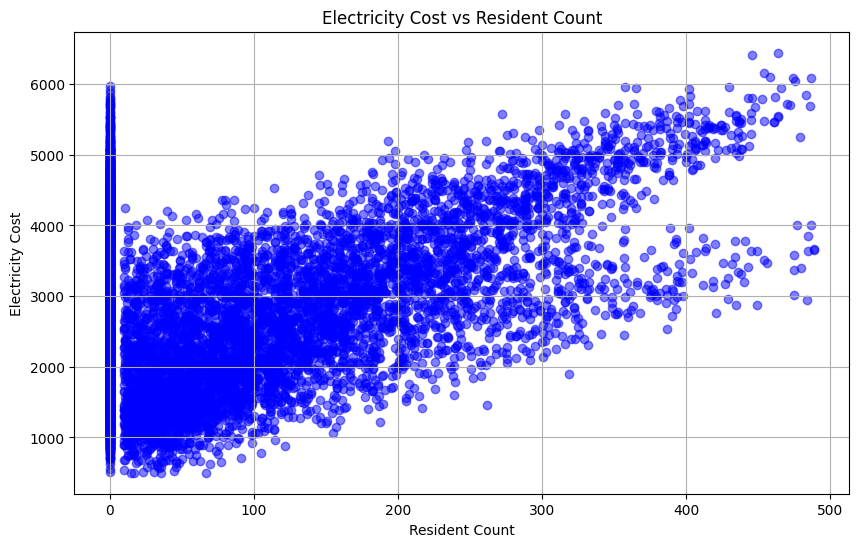

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(electricity_cost_df['resident count'], electricity_cost_df['electricity cost'], alpha=0.5, color='blue')
plt.title('Electricity Cost vs Resident Count')
plt.xlabel('Resident Count')
plt.ylabel('Electricity Cost')
plt.grid(True)
plt.show()

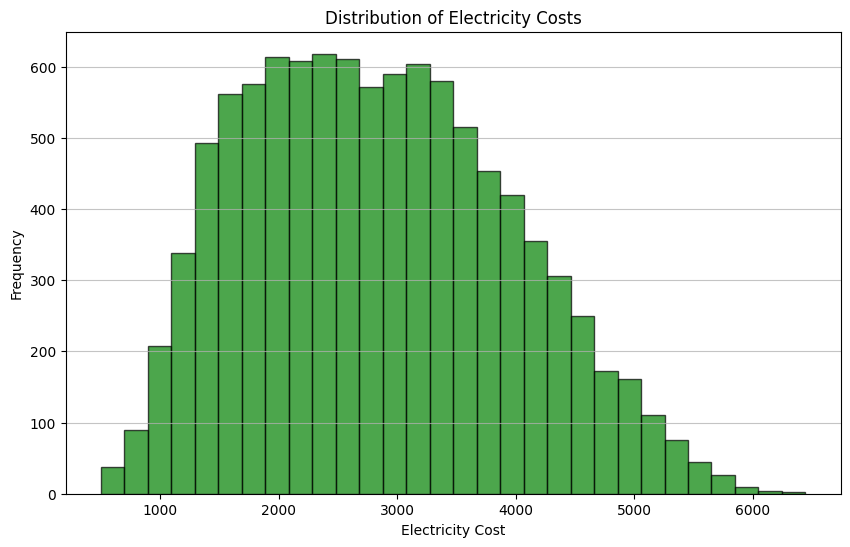

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(electricity_cost_df['electricity cost'], bins=30, color='green', alpha=0.7, edgecolor='black')
plt.title('Distribution of Electricity Costs')
plt.xlabel('Electricity Cost')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [45]:
average_electricity_cost_by_structure = electricity_cost_df.groupby('structure type')['electricity cost'].mean()
average_electricity_cost_by_structure

structure type
Commercial     2812.206988
Industrial     3397.109562
Mixed-use      2304.945906
Residential    2992.465347
Name: electricity cost, dtype: float64

<Figure size 1000x600 with 0 Axes>

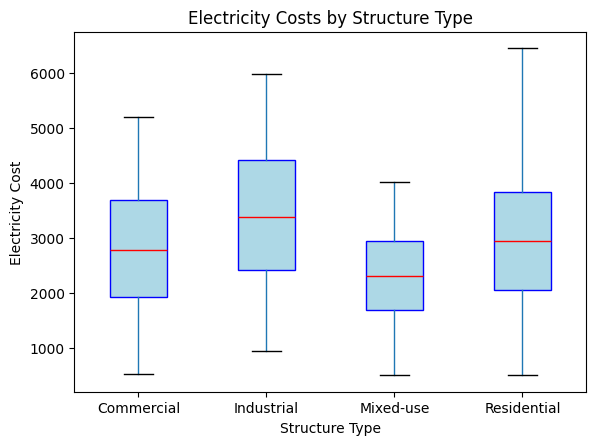

In [47]:
plt.figure(figsize=(10, 6))
electricity_cost_df.boxplot(column='electricity cost', by='structure type', grid=False, patch_artist=True,
                            boxprops=dict(facecolor='lightblue', color='blue'),
                            medianprops=dict(color='red'))
plt.title('Electricity Costs by Structure Type')
plt.suptitle('')  # Suppress the automatic title
plt.xlabel('Structure Type')
plt.ylabel('Electricity Cost')
plt.show()

In [49]:
# Correcting the error by defining numerical_features from the dataset
numerical_features = electricity_cost_df.select_dtypes(include=['int64', 'float64'])

# Now calculating the correlation matrix
correlation_matrix = numerical_features.corr()
correlation_matrix

site area  water consumption  recycling rate  \
site area              1.000000           0.745372        0.006786   
water consumption      0.745372           1.000000        0.006977   
recycling rate         0.006786           0.006977        1.000000   
utilisation rate       0.019681           0.008711       -0.022350   
air qality index      -0.003770           0.000929       -0.011125   
issue reolution time   0.007520           0.007786       -0.005641   
resident count         0.360160           0.281256       -0.008540   
electricity cost       0.874376           0.698775       -0.012536   

                      utilisation rate  air qality index  \
site area                     0.019681         -0.003770   
water consumption             0.008711          0.000929   
recycling rate               -0.022350         -0.011125   
utilisation rate              1.000000         -0.008747   
air qality index             -0.008747          1.000000   
issue reolution time         -0.000795         -0.027277   
resident count                0.012424          0.013728   
electricity cost              0.207215          0.017376   

                      issue reolution time  resident count  electricity cost  
site area                         0.007520        0.360160          0.874376  
water consumption                 0.007786        0.281256          0.698775  
recycling rate                   -0.005641       -0.008540         -0.012536  
utilisation rate                 -0.000795        0.012424          0.207215  
air qality index                 -0.027277        0.013728          0.017376  
issue reolution time              1.000000       -0.014663          0.042325  
resident count                   -0.014663        1.000000          0.361609  
electricity cost                  0.042325        0.361609          1.000000

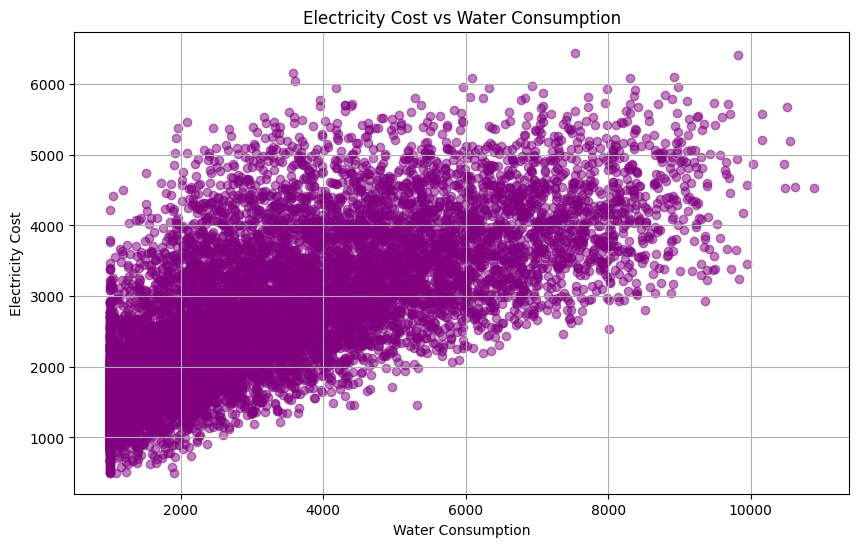

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(electricity_cost_df['water consumption'], electricity_cost_df['electricity cost'], alpha=0.5, color='purple')
plt.title('Electricity Cost vs Water Consumption')
plt.xlabel('Water Consumption')
plt.ylabel('Electricity Cost')
plt.grid(True)
plt.show()

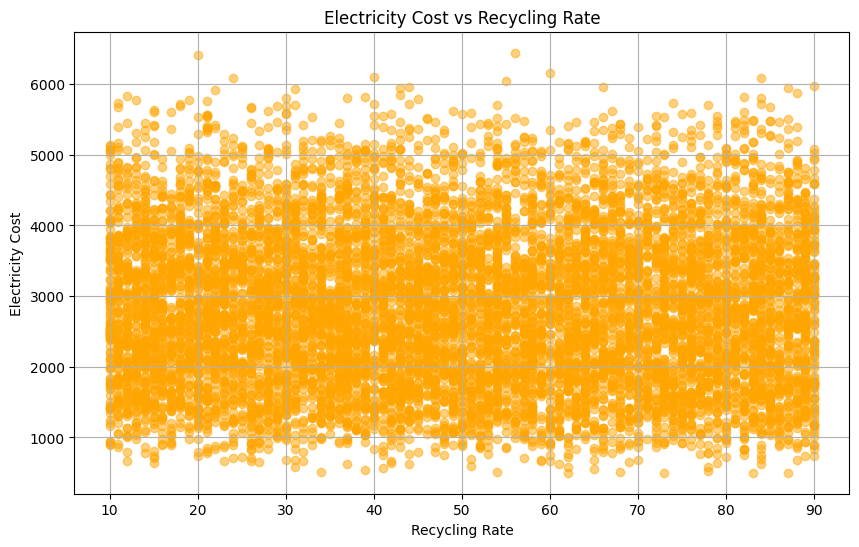

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(electricity_cost_df['recycling rate'], electricity_cost_df['electricity cost'], alpha=0.5, color='orange')
plt.title('Electricity Cost vs Recycling Rate')
plt.xlabel('Recycling Rate')
plt.ylabel('Electricity Cost')
plt.grid(True)
plt.show()

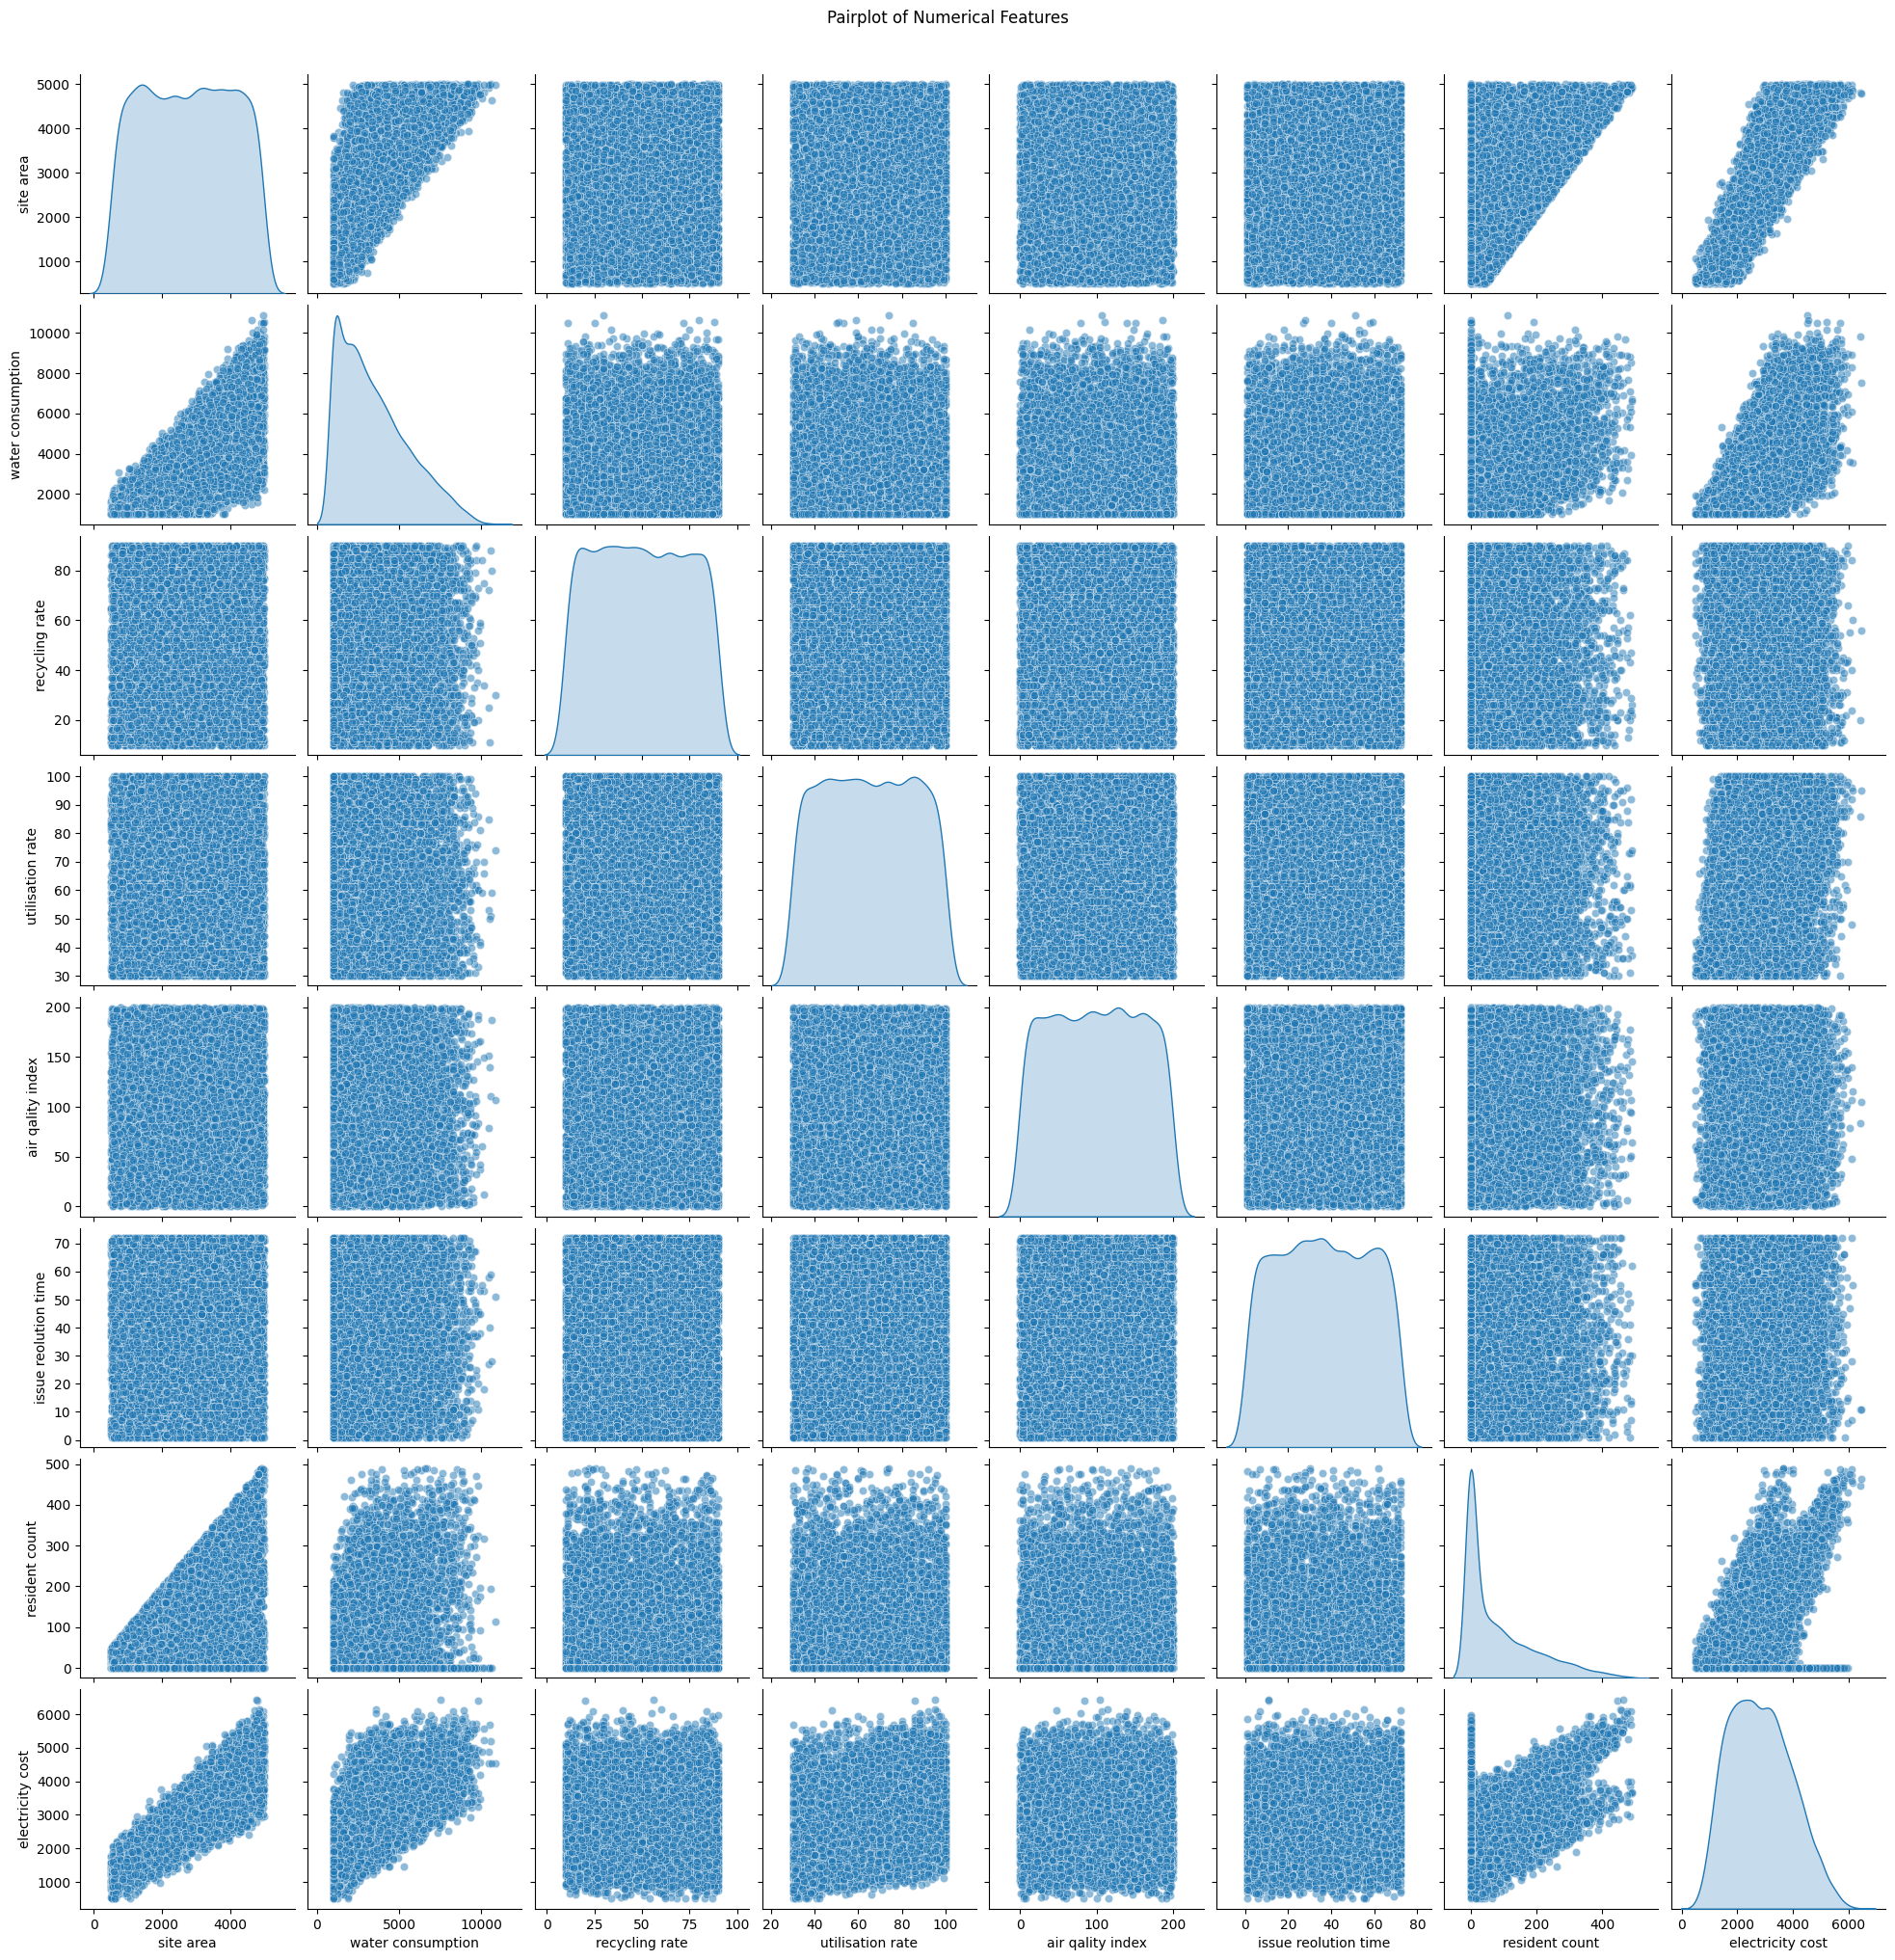

In [55]:
# Pairplot for numerical features to visualize relationships
sns.pairplot(numerical_features, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

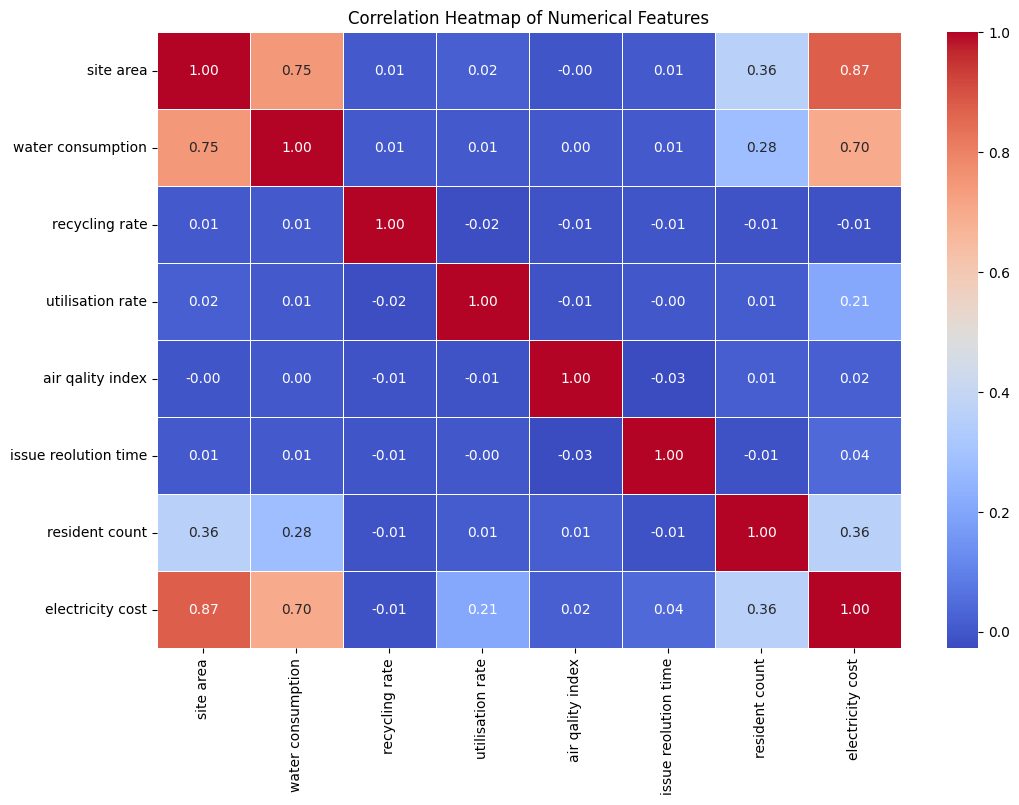

In [57]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Splitting Dataset

In [59]:
# Define features and target variable
X = electricity_cost_df.drop(columns=['electricity cost'])
y = electricity_cost_df['electricity cost']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 8), (2000, 8), (8000,), (2000,))

The dataset has been split into training and testing sets:
- Training set: 8000 samples
- Testing set: 2000 samples

# LINEAR REGRESSION

In [71]:
 # Define the column transformer for preprocessing
categorical_features = ['structure type']
numerical_features = ['site area', 'water consumption', 'recycling rate', 'utilisation rate', 'air qality index', 'issue reolution time', 'resident count']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Create the pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

rmse, r2, mae

(312.06073371807986, 0.9219379221210362, 245.65199402772507)

The regression model has been trained, and the Root Mean Squared Error (RMSE) on the test set is approximately 312.06.
- R-squared: 0.922 (indicating that the model explains approximately 92.2% of the variance in electricity costs).
- Mean Absolute Error (MAE): 245.65.

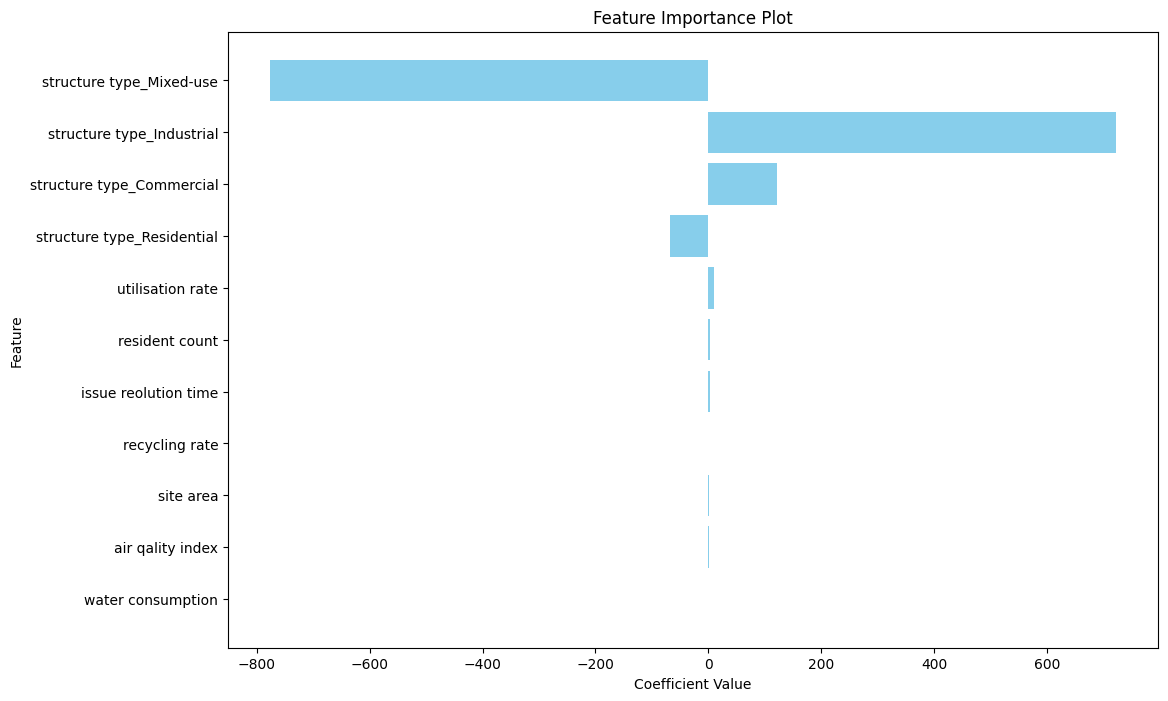

In [76]:
# Extract feature names after preprocessing
feature_names = numerical_features + list(model.named_steps['preprocessor']
                                          .named_transformers_['cat']
                                          .get_feature_names_out(categorical_features))

# Extract coefficients from the linear regression model
coefficients = model.named_steps['regressor'].coef_

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

# Sort by absolute importance
feature_importance['Absolute Importance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()
plt.show()

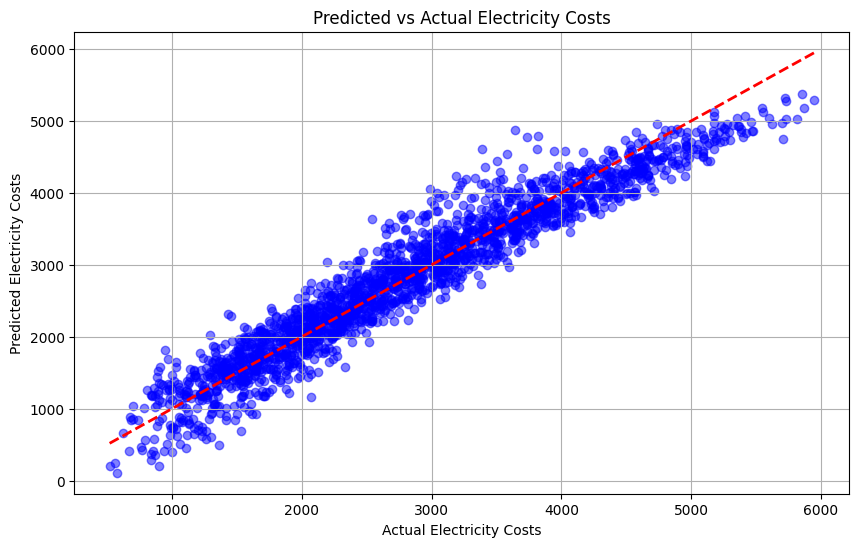

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Predicted vs Actual Electricity Costs')
plt.xlabel('Actual Electricity Costs')
plt.ylabel('Predicted Electricity Costs')
plt.grid(True)
plt.show()

# Random Forest Regressor

In [83]:
# Create a new pipeline with RandomForestRegressor
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the RandomForest model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_rf_pred = rf_model.predict(X_test)

# Evaluate the RandomForest model
rf_rmse = np.sqrt(mean_squared_error(y_test, y_rf_pred))
rf_r2 = r2_score(y_test, y_rf_pred)
rf_mae = mean_absolute_error(y_test, y_rf_pred)

rf_rmse, rf_r2, rf_mae

(221.30000883777657, 0.9607423119888199, 175.92564000000002)

The RandomForestRegressor model's performance metrics are as follows:
- RMSE: 221.30
- R-squared: 0.961 (indicating that the model explains approximately 96.1% of the variance in electricity costs).
- MAE: 175.93

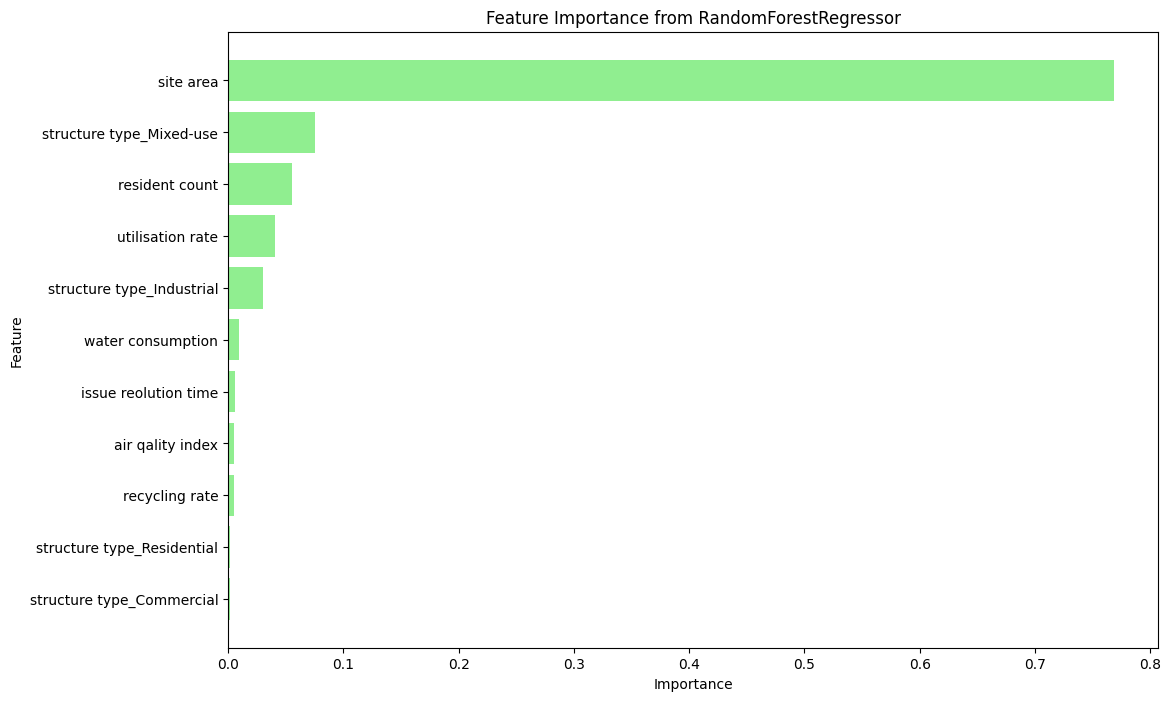

In [88]:
# Extract feature importances from the RandomForestRegressor model
rf_feature_importances = rf_model.named_steps['regressor'].feature_importances_

# Create a DataFrame for feature importance
rf_feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_feature_importances
})

# Sort by importance
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(rf_feature_importance_df['Feature'], rf_feature_importance_df['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from RandomForestRegressor')
plt.gca().invert_yaxis()
plt.show()

# SVM MODELLING

In [90]:
from sklearn.svm import SVR

# Create a new pipeline with Support Vector Regressor
svr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

# Train the SVR model
svr_model.fit(X_train, y_train)

# Predict on the test set
y_svr_pred = svr_model.predict(X_test)

# Evaluate the SVR model
svr_rmse = np.sqrt(mean_squared_error(y_test, y_svr_pred))
svr_r2 = r2_score(y_test, y_svr_pred)
svr_mae = mean_absolute_error(y_test, y_svr_pred)

svr_rmse, svr_r2, svr_mae

(693.8901900555813, 0.6140390630384087, 545.7398549918425)

The Support Vector Regressor (SVR) model's performance metrics are as follows:
- RMSE: 693.89
- R-squared: 0.614 (indicating that the model explains approximately 61.4% of the variance in electricity costs).
- MAE: 545.74

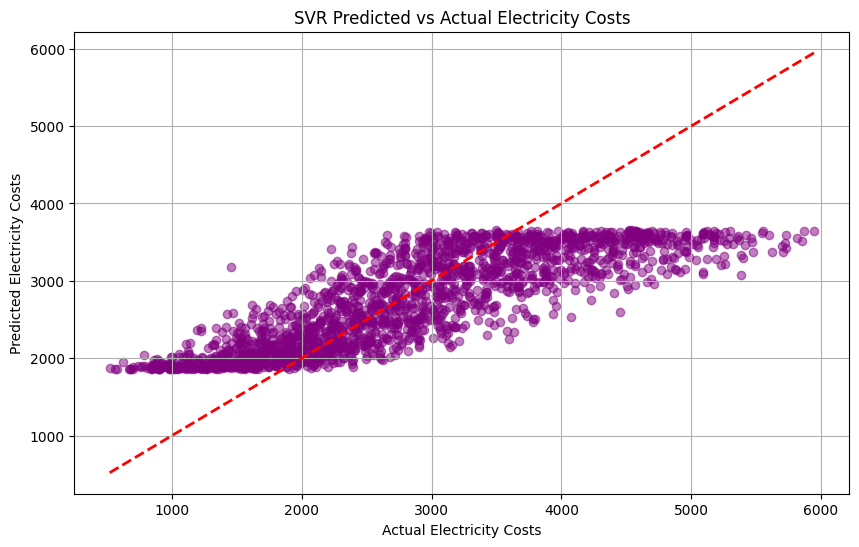

In [93]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_svr_pred, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('SVR Predicted vs Actual Electricity Costs')
plt.xlabel('Actual Electricity Costs')
plt.ylabel('Predicted Electricity Costs')
plt.grid(True)
plt.show()

# DATA RESULTS

In [97]:
# Create a summary report comparing the performance of the three models
summary_report = f"""
Model Performance Comparison:

Linear Regression:
- RMSE: {rmse:.2f}
- R-squared: {r2:.3f}
- MAE: {mae:.2f}

Random Forest Regressor:
- RMSE: {rf_rmse:.2f}
- R-squared: {rf_r2:.3f}
- MAE: {rf_mae:.2f}

Support Vector Regressor (SVR):
- RMSE: {svr_rmse:.2f}
- R-squared: {svr_r2:.3f}
- MAE: {svr_mae:.2f}

Best Model: Random Forest Regressor (highest R-squared and lowest RMSE/MAE)
"""

print(summary_report)


Model Performance Comparison:

Linear Regression:
- RMSE: 312.06
- R-squared: 0.922
- MAE: 245.65

Random Forest Regressor:
- RMSE: 221.30
- R-squared: 0.961
- MAE: 175.93

Support Vector Regressor (SVR):
- RMSE: 693.89
- R-squared: 0.614
- MAE: 545.74

Best Model: Random Forest Regressor (highest R-squared and lowest RMSE/MAE)



In [99]:


# Define the parameter grid for hyperparameter tuning of RandomForestRegressor
rf_param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Create a new pipeline for GridSearchCV
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Perform GridSearchCV for RandomForestRegressor
rf_grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=rf_param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Best parameters and best score for RandomForestRegressor
rf_best_params = rf_grid_search.best_params_
rf_best_score = -rf_grid_search.best_score_

rf_best_params, rf_best_score

({'regressor__max_depth': 20,
  'regressor__min_samples_leaf': 2,
  'regressor__min_samples_split': 2,
  'regressor__n_estimators': 200},
 51229.25658072607)

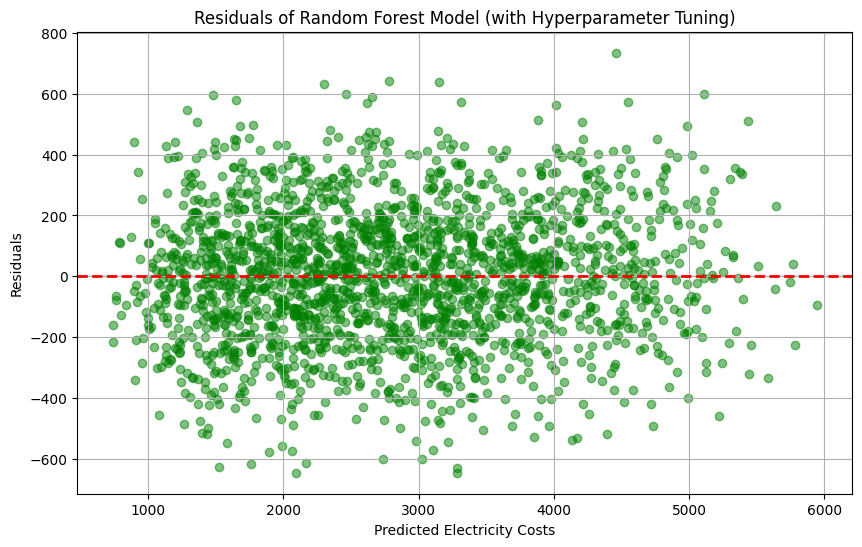

In [101]:
# Train the RandomForest model with the best hyperparameters
rf_best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=200,
        max_depth=20,
        min_samples_split=2,
        min_samples_leaf=2,
        random_state=42
    ))
])

rf_best_model.fit(X_train, y_train)

# Predict on the test set
y_rf_best_pred = rf_best_model.predict(X_test)

# Calculate residuals
rf_residuals = y_test - y_rf_best_pred

# Visualize residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_rf_best_pred, rf_residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals of Random Forest Model (with Hyperparameter Tuning)')
plt.xlabel('Predicted Electricity Costs')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# SAVED AND LOAD MODELS 

In [106]:
# Save the best Random Forest model to a file
joblib.dump(rf_best_model, 'random_forest_best_model.pkl')

# Load the saved Random Forest model
loaded_rf_model = joblib.load('random_forest_best_model.pkl')